In [1]:
from adnmtf import NMF, NTF
import pandas as pd
import numpy as np
from IPython.display import clear_output
import time
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib.image as image
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import distinctipy
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

import sys
import networkx as nx

from sklearn.preprocessing import normalize
from sklearn import metrics

from mvlearn.datasets import load_UCImultifeature
from mvlearn.embed import MVMDS
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import umap
from scipy.spatial import distance_matrix
import hoggorm as ho
import adilsm.adilsm as ilsm
from sklearn.metrics.cluster import rand_score
from sklearn.preprocessing import StandardScaler

from mofapy2.run.entry_point import entry_point

adilsm version=0.0.12


Data prep

In [2]:
###############################################################################
# Load Data
# ---------
# Data comes from UCI Digits Data. Contains 6 views and classifications of
# numbers 0-9

Xs, list_digits = load_UCImultifeature()

sample_rate = 1

if sample_rate < 1:
    num_rows = list_digits.shape[0]
    num_rows_to_select = int(num_rows * sample_rate)
    selected_rows = np.random.choice(num_rows, num_rows_to_select, replace=False)

    for i in range(len(Xs)):
        Xs[i] = Xs[i][selected_rows]

    list_digits = list_digits[selected_rows]

list_cell_codes, list_cell_types = pd.factorize(list_digits)

# Check data
print(f'There are {len(Xs)} views.')
print(f'There are {Xs[0].shape[0]} observations')
print(f'The feature sizes are: {[X.shape[1] for X in Xs]}')


There are 6 views.
There are 2000 observations
The feature sizes are: [76, 216, 64, 240, 47, 6]


In [3]:
Xs_norm = Xs.copy()
scaler = StandardScaler()
for i in range(len(Xs)):
    Xs_norm[i] = Xs[i] - np.mean(Xs[i], axis=0)
    Xs_norm[i] = scaler.fit_transform(Xs_norm[i])

In [4]:
total_variance = np.zeros(17)
for k in range(2,17):
    data_mat = [[None for g in range(1)] for m in range(4)]

    for m in range(4):
        data_mat[m][0] = Xs_norm[m]

    ent = entry_point()
    ent.set_data_matrix(data_mat, likelihoods = ["gaussian" for _ in range(4)])
    ent.set_model_options(
        factors = k, 
        spikeslab_weights = False, 
        ard_weights = True
    )
    ent.set_train_options(
        convergence_mode = "fast", 
        dropR2 = 0.001, 
        gpu_mode = False, 
        seed = 1
    )
    ent.build()
    ent.run()

    total_variance[k] = np.sum(ent.model.calculate_variance_explained())




        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
View names not provided, using default naming convention:
- view1, view2, ..., viewM

Features names not provided, using default naming convention:
- feature1_view1, featureD_viewM

Groups names not provided, using default naming convention:
- group1, group2, ..., groupG

Samples names not provided, using default naming convention:
- sample1_group1, sample2_group1, sample1_group

Figures

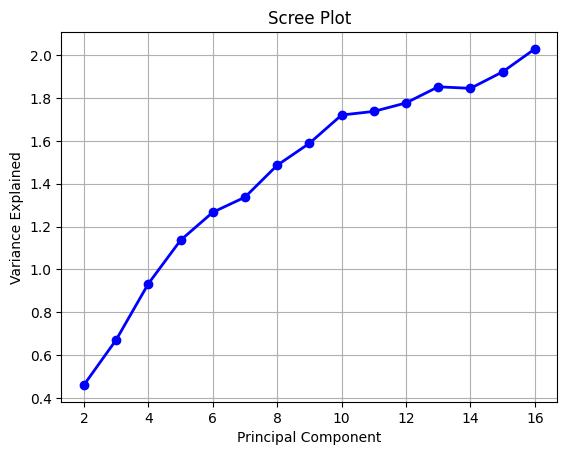

In [5]:
# Plot the scree plot
plt.plot (np.arange(2,17), total_variance[2:17], 'o-', linewidth=2, color='blue')
plt.xlabel ('Principal Component')
plt.ylabel ('Variance Explained')
plt.title ('Scree Plot')
plt.grid ()
plt.show ()